# Backpropagation Lab





In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [ ]:
#Iris with no regularization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.neural_network import MLPClassifier
import pandas as pd

# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
# encode the targets to be 0, 1, 2
irisLabelsEncoded = irisDataFrame.apply(LabelEncoder().fit_transform)

# define the features
X = irisLabelsEncoded[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
# define the target
y = irisLabelsEncoded['class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd', alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)

# train model
clf.fit(X_train, y_train)

# output model info
print('number of iterations: ', clf.n_iter_)
print('training score: ', clf.score(X_train, y_train))
print('test score', clf.score(X_test, y_test))


**Discussion:**  
I ran the MLP model on the iris dataset several times as the above directions stated. For clarity, I created a table with training accuracy, test accuracy, and number of iterations.  

As I reviewed the results provided my the MLP model, I see what I had expected. First, the training accuracy is slightly higher on all trial runs. This is expected because it is on the training data that the MLP model determined and optimized its weights. So, when the model is run on the training data, it is natural that we should generally see a higher score on the training set than on the test set.

| Trial | Training Accuracy | Test accuracy | Number of iterations |
| --- | --- | --- | --- |
| 1 | 0.95 | 0.8666666666666667 | 264 |
| 2 | 0.9833333333333333 | 0.9666666666666667 | 238 |
| 3 | 0.9833333333333333 | 0.9666666666666667 | 418 |
| 4 | 0.9166666666666666 | 0.9333333333333333 | 261 |
| 5 | 0.9833333333333333 | 0.9666666666666667 | 222 |
| Average | 0.963333333333 | 0.94 | 280.6 | 

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

In [ ]:
#Iris with early stopping and validation scores graph
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
# encode the targets to be 0, 1, 2
irisLabelsEncoded = irisDataFrame.apply(LabelEncoder().fit_transform)

# define the features
X = irisLabelsEncoded[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
# define the target
y = irisLabelsEncoded['class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

clf = MLPClassifier(early_stopping=True, validation_fraction=0.15, hidden_layer_sizes=[64], activation='logistic', solver='sgd', alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)

# train model
clf.fit(X_train, y_train)

# output model info
print('number of iterations: ', clf.n_iter_)
print('training accuracy: ', clf.score(X_train, y_train))
print('test accuracy', clf.score(X_test, y_test))
print('best validation score: ', clf.best_validation_score_)


# create a list of points for the line to pass through
points = []
for index in range(len(clf.validation_scores_)):
    points.append([index, clf.validation_scores_[index]])

data = np.array(points)

# Create a plot of data
plt.xlim(0,len(data))
plt.ylim(0,1)
plt.plot(data[:, 0], data[:, 1], linestyle='-', color='blue')

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
plt.title('Validation Score Vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Score')
plt.grid()
plt.show()

| Trial | Number of Iterations | Training Score | Test Score | Best Validation Score |
| --- | --- | --- | --- | --- |
| 1 | 145 | 0.9583333333333334 | 0.9666666666666667 | 0.9444444444444444 |
| 2 | 56 | 0.9666666666666667 | 0.9666666666666667 | 1.0 |
| 3 | 55 | 0.9166666666666666 | 0.9666666666666667 | 1.0 |
| 4 | 58 | 0.9833333333333333 | 0.8333333333333334 | 1.0 |
| 5 | 52 | 0.95 | 1.0 | 1.0 |
| Average | 73.2 | 0.955 | 0.94666666666667 | 0.98888888888889 |


**Discussion:**  
As you can see from the above charts, in this section I was applying early_stopping. As a result, the average number of epochs dropped from 280.6 to 73.2. Early stopping, when used correctly, can help avoid overfit by stopping the model when the validation score has not improved by a certain amount in n_iter_no_change. By stopping the model at this point, we prevent the model from training too intensely on the training data when it is not sufficiently improving. Early stopping ensures that when the model isn't improving, it ends so that the model better generalizes to unseen data.  

As you can see from the example above, I have n_iter_no_change set to 50. That means that the model will end when a certain amount of change is not seen in 50 epochs. Looking at the graph "Validaion Score vs. Epoch" you can see that there is a huge improvement around epoch number 9, then, 50 iterations later, after this improvement has not been repeated, the model ends. This shows that early_stopping is acting as expected.  

Finally, as expected, there is a general upward trend in accuracy as the number of epochs increases. This is expected because at the beginning, in the first couple epochs the model is essentially guessing at the output. However as time goes on, the model refines its weights and becomes more accurate. So, as expected, the average accuracy increases.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

In [1]:
#Iris with Loss Regularization 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
from sklearn.neural_network import MLPClassifier
import pandas as pd

# get data
irisData = arff.loadarff('iris.arff')

# put data into a data frame
irisDataFrame = pd.DataFrame(irisData[0])
# encode the targets to be 0, 1, 2
irisLabelsEncoded = irisDataFrame.apply(LabelEncoder().fit_transform)

# define the features
X = irisLabelsEncoded[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
# define the target
y = irisLabelsEncoded['class']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

alphaValues = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
for alpha in alphaValues:

    numOfIterations = []
    trainingScore = []
    testScore = []
    bestLosses = []

    for run in range(10):
        clf = MLPClassifier(hidden_layer_sizes=[64], activation='logistic', solver='sgd', alpha=alpha, batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)

        # train model
        clf.fit(X_train, y_train)

        numOfIterations.append(clf.n_iter_)
        trainingScore.append(clf.score(X_train, y_train))
        testScore.append(clf.score(X_test, y_test))
        bestLosses.append(clf.best_loss_)

    # output model info
    print('alpha: ', alpha)
    print('average number of iterations: ', sum(numOfIterations)/len(numOfIterations))
    print('average training score: ', sum(trainingScore)/len(trainingScore))
    print('average test score', sum(testScore)/len(testScore))
    print('average best loss: ', sum(bestLosses)/len(bestLosses))


alpha:  0.1
average number of iterations:  251.8
average training score:  0.9408333333333335
average test score 0.9666666666666668
average best loss:  0.5217660182449364
alpha:  0.01
average number of iterations:  243.8
average training score:  0.9691666666666666
average test score 0.95
average best loss:  0.2180915959620291
alpha:  0.001
average number of iterations:  208.5
average training score:  0.97
average test score 0.9533333333333335
average best loss:  0.11704652194947296
alpha:  0.0001
average number of iterations:  267.2
average training score:  0.9558333333333332
average test score 0.9633333333333335
average best loss:  0.07805119912810851
alpha:  1e-05
average number of iterations:  232.4
average training score:  0.9683333333333334
average test score 0.9533333333333334
average best loss:  0.0875180942707284
alpha:  1e-06
average number of iterations:  257.4
average training score:  0.9599999999999997
average test score 0.95
average best loss:  0.07967080304685359


*Discussion and comparison between no regularization, early stopping, and loss regularization*  

**Discussion:**  
| Alpha Value | Average Number of Iterations | Average Training Set Accuracy | Average Test Set Accuracy | Average Best Loss Value |
| --- | --- | --- | --- | --- |
| 0.1 | 251.8 | 0.9408333333333335 | 0.9666666666666668 | 0.5217660182449364 |
| 0.01 | 243.8 | 0.9691666666666666 | 0.95 | 0.2180915959620291 |
| 0.001 | 208.5 | 0.97 | 0.9533333333333335 | 0.11704652194947296 |
| 0.0001 | 267.2 | 0.9558333333333332 | 0.9633333333333335 | 0.07805119912810851 |
| 0.00001 | 232.4 | 0.9683333333333334 | 0.9533333333333334 | 0.0875180942707284 |
| 0.000001 | 257.4 | 0.9599999999999997 | 0.95 | 0.07967080304685359 |  

The above chart displays the average value value for number of iterations, training set accuracy, test set accuracy, and best loss value for 6 alpha values at 10 runs for each alpha value (0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001). I decided to use averages because it is difficult to determine which alpha value provides the best results from a single run. With all runs completed and averaged, it looks like I got the best results when alpha equals 0.0001. Interestingly, this is also the default value for alpha, which I guess makes sense, that is probably why it was chosen as the default.

Comparing my results for loss regularization to no regularization, they are pretty much the same when alpha = 0.0001. This makes sense because in section 1.1 alpha is also equal to 0.0001. That being said however, my accuracy with loss regularization is better and my number of iterations is the same. Futher, when comparing these results to the results I obtained with early stopping, you notive there are several differences. First, as expected the number of epochs are significantly higher with loss regularization than with early stopping. Where early stopping had an average number of epoch of 73.2, with loss regularization the average numer of epochs was about 250. This makes sense because loss regularization doesn't limit the number of epochs, instead it focuses on minimizing loss.  

Regularization (both with loss and early stopping) are meathods to prevent overfitting and help the model fit a more general dataset by stopping he model when it has sufficiently learned the dataset, but not so much that it doesn't generalize well.  

In this process I also learned about the significance of alpha and the best loss value. Alpha is a constant which the penalty function is multiplied by. A low alpha value will punish error less harshly, but potentially allow overfitting because the weights are not being regularized. On the other hand too large of an alpha value can lead to underfitting becuase weights are punished heavily when error occurs and weights are made more even.


## 2 Hyperparameters 
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum. 

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

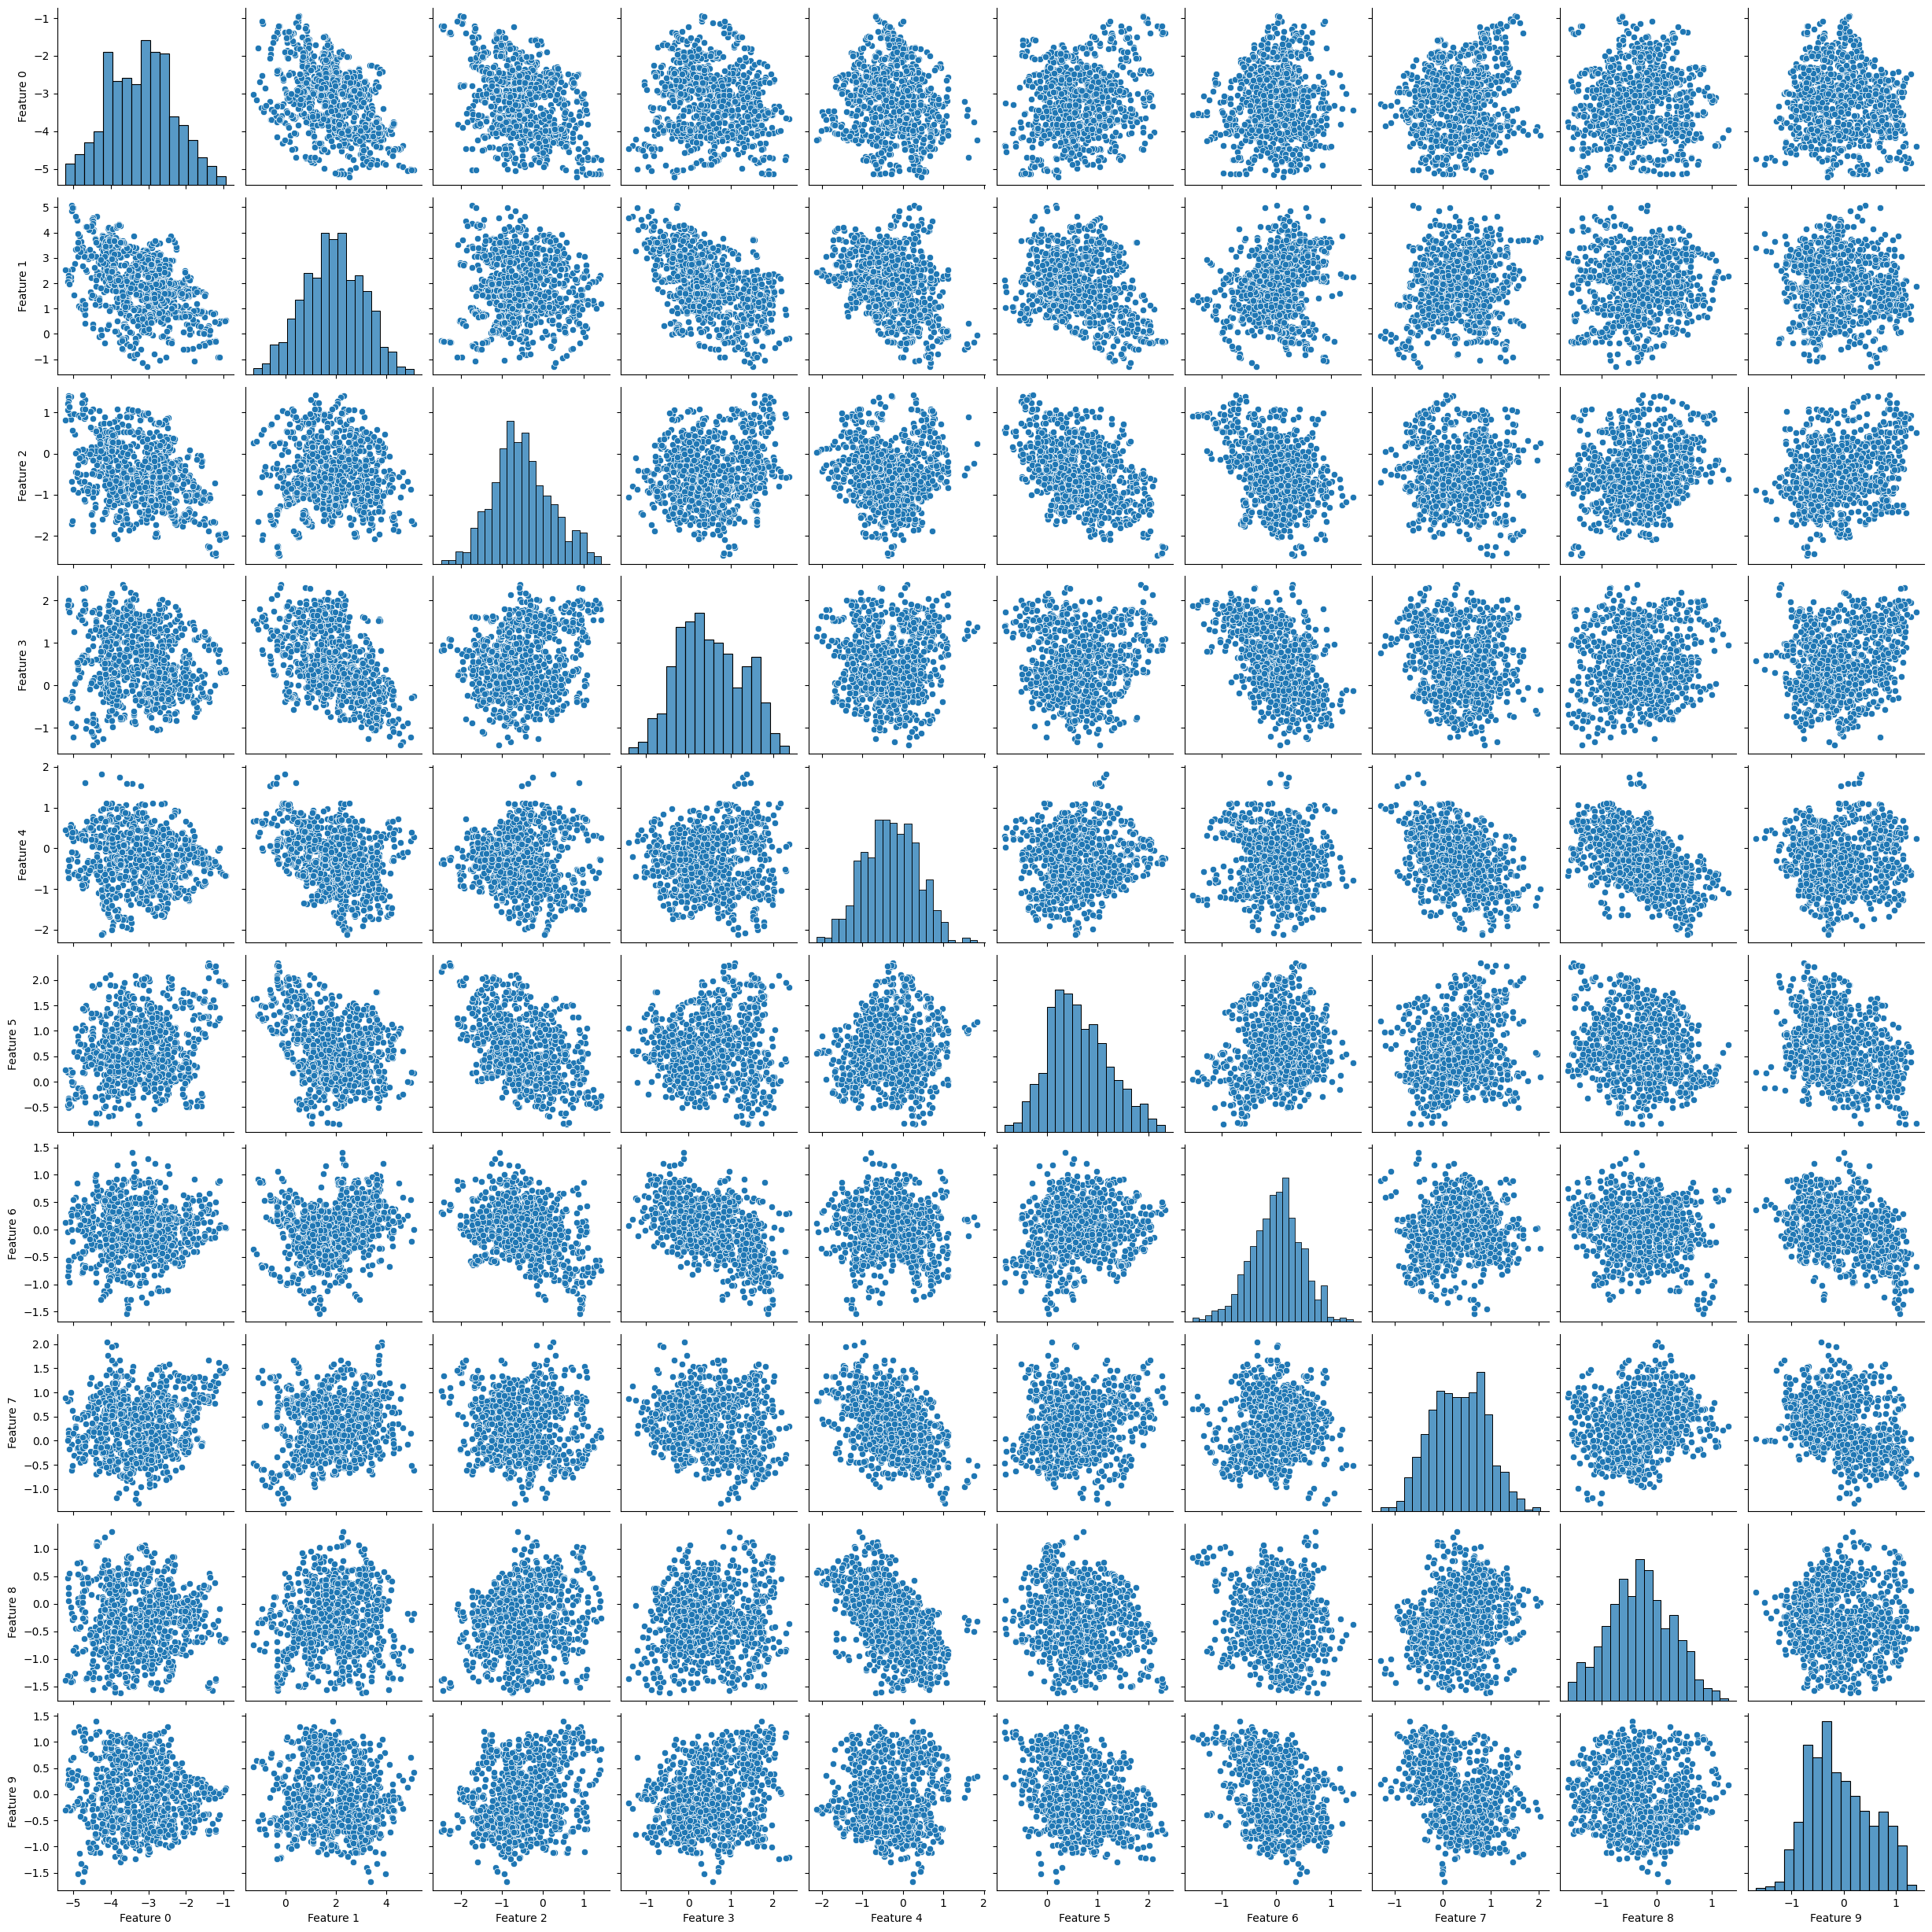

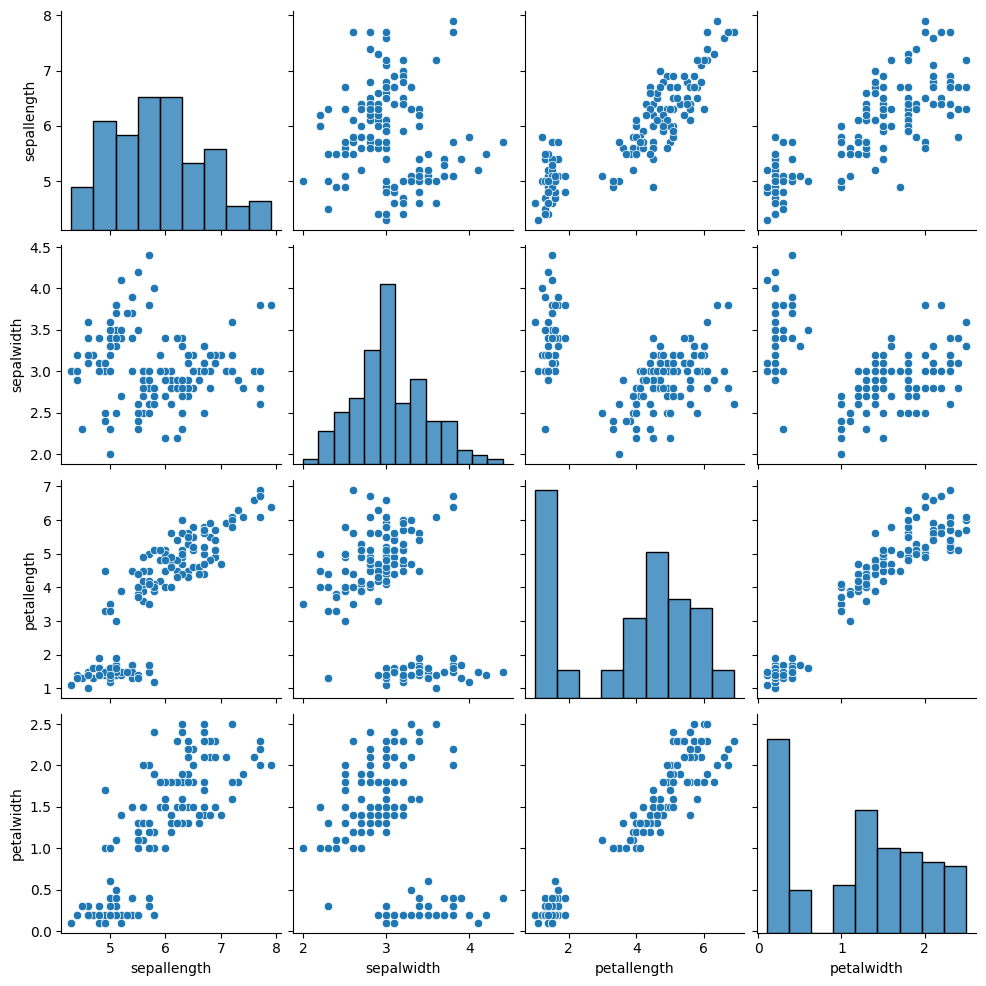

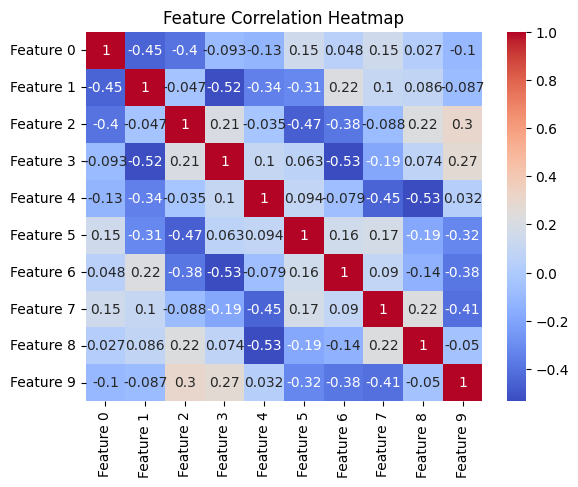

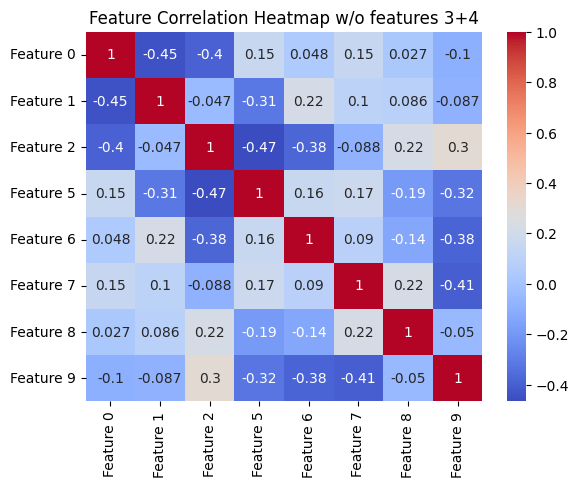

In [12]:
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import seaborn as sns

# visualize the vowel dataset
data, meta = arff.loadarff('vowel.arff')
df = pd.DataFrame(data)
sns.pairplot(df)
plt.show()


# visualize the iris dataset
data, meta = arff.loadarff('iris.arff')
df = pd.DataFrame(data)
sns.pairplot(df)
plt.show()


# visualiize the vowel dataset as a heatmap with all features
data, meta = arff.loadarff('vowel.arff')
df = pd.DataFrame(data)
df = df.drop(columns=['Train or Test', 'Speaker Number', 'Sex', 'Class'])
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# visualize the vowel dataset as a heatmap with all features except 3 and 4
data, meta = arff.loadarff('vowel.arff')
df = pd.DataFrame(data)
df = df.drop(columns=['Train or Test', 'Speaker Number', 'Sex', 'Class', 'Feature 3', 'Feature 4'])
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap w/o features 3+4')
plt.show()

**Discussion:**  
The baseline accuracy for any dataset can be determined with the formula 1/n, where n is the number of output classes. This is the baseline accuracy because even if the model were to just randomly output the most common output value, it would do at least this well. This means that for the iris dataset, the baseline accuracy is 33%. I say this because there are 3 output classes, each of equal size, so 1/3 = 33%. This means that for the vowel dataset the baseline accuracy is about 9%. I say that because in the iris dataset there are 11 output classes, each of equal size. This means that the baseline accuracy is determined by 1/11 -> 9%.  

To see why the vowel dataset will likely have a lower accuracy than iris, consider the above graphs. The first set of graphs plots every feature of the vowel dataset against every other feature of the vowel dataset. As you can tell, there is very little seperation between variables. As we decided during the perceptron lab, classifing data that is linearly seperable is much more accurate. On the other hand, consider the iris dataset. In this dataset there seems to be seperation between every variable, making this dataset much easier to classify.  

Finally, when deciding which input features NOT to use in training, I created a heatmap (See Above). On this heatmap,you can see that there is reletively high correlation (abs(corr) > 0.5) between several sets of features. Particularly between 1 and 3, 3 and 6, and 4 and 8. These high correlations mean that the data held in these features is moderately repetitive, possibly just adding noise to the data. So, by removing these features, I have reduced redundancy and noise in my data.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [7]:
# Train with different learning rates
from sklearn.model_selection import train_test_split
from scipy.io import arff
from sklearn.neural_network import MLPClassifier
import pandas as pd

# get data
vowelData = arff.loadarff('vowel.arff')

# put data into a data frame
vowelDataFrame = pd.DataFrame(vowelData[0])

# drop columns that aren't important
vowelDataFrame = vowelDataFrame.drop('Train or Test', axis=1)
vowelDataFrame = vowelDataFrame.drop('Feature 3', axis=1)
vowelDataFrame = vowelDataFrame.drop('Feature 4', axis=1)

# make sex 1/0
vowelDataFrame['Sex'] = vowelDataFrame['Sex'].str.decode('utf-8')
vowelDataFrame = vowelDataFrame.replace('Male', 0)
vowelDataFrame = vowelDataFrame.replace('Female', 1)

# make a seperate input node for every speaker
vowelDataFrame = pd.get_dummies(vowelDataFrame, columns=['Speaker Number'])

# define the features
X = vowelDataFrame.drop('Class', axis=1)

# define the target
y = vowelDataFrame['Class']
y = pd.get_dummies(y)


learningRates = [0.001, 0.01, 0.1, 1.0, 3.0, 5.0, 7.0, 10.0]
for currLearningRate in learningRates:
    iterations = []
    trainingScore = []
    testScore = []
    for run in range(5):

        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75)
        clf = MLPClassifier(hidden_layer_sizes=(48,), learning_rate_init=currLearningRate, max_iter=1000, early_stopping=False)

        # train model
        clf.fit(X_train, y_train)

        iterations.append(clf.n_iter_)
        trainingScore.append(clf.score(X_train, y_train))
        testScore.append(clf.score(X_test, y_test))
    
    print('Learning Rate: ', currLearningRate)
    print('Average Number of Epochs: ', sum(iterations)/len(iterations))
    print('Average Training Score: ', sum(trainingScore)/len(trainingScore))
    print('Average Test Score: ', sum(testScore)/len(testScore))
    print()


C:\Users\child\AppData\Local\Temp\ipykernel_21888\3903949015.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vowelDataFrame = vowelDataFrame.replace('Female', 1)
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\child\AppData\Local\Programs\Python\Python311\Lib\site-packages\sk

Learning Rate:  0.001
Average Number of Epochs:  1000.0
Average Training Score:  0.9121293800539083
Average Test Score:  0.7427419354838709

Learning Rate:  0.01
Average Number of Epochs:  773.0
Average Training Score:  1.0
Average Test Score:  0.8532258064516128

Learning Rate:  0.1
Average Number of Epochs:  89.8
Average Training Score:  0.8997304582210243
Average Test Score:  0.7217741935483872

Learning Rate:  1.0
Average Number of Epochs:  47.6
Average Training Score:  0.014285714285714285
Average Test Score:  0.012903225806451613

Learning Rate:  3.0
Average Number of Epochs:  44.0
Average Training Score:  0.001078167115902965
Average Test Score:  0.0016129032258064516

Learning Rate:  5.0
Average Number of Epochs:  51.2
Average Training Score:  0.0037735849056603774
Average Test Score:  0.0016129032258064516

Learning Rate:  7.0
Average Number of Epochs:  57.8
Average Training Score:  0.008355795148247979
Average Test Score:  0.0064516129032258064

Learning Rate:  10.0
Average N

*Discuss your table and the effect of different learning rates on both training time and accuracy*
**Discussion:**  
| Learning Rate | Number of Epochs | Average Test Accuracy | Average Training Accuracy |
| --- | --- | --- | --- |
| 0.001 | 1000.0 | 0.7427419354838709 | 0.9121293800539083 |
| 0.01 | 773.0 | 0.8532258064516128 | 1.0 |
| 0.1 | 89.8 | 0.7217741935483872 | 0.8997304582210243 |
| 1.0 | 47.6 | 0.012903225806451613 | 0.014285714285714285 |
| 3.0 | 44.0 | 0.0016129032258064516 | 0.001078167115902965 |
| 5.0 | 51.2 | 0.0016129032258064516 | 0.0037735849056603774 |
| 7.0 | 57.8 | 0.0064516129032258064 | 0.008355795148247979 |
| 10.0 | 70.2 | 0.004032258064516129 | 0.007547169811320756 |

As you can see from the above table, there is clearly a relationship betwen the learning rate and the MLPClassifier Algorithm (Number of Epochs, Average Test Accuracy, and Average Training Accuracy).  

First, let's consider how learning rate impacts the Number of Epochs. As the Learning Rate increases, the Number of Epochs decreases until the learning rate is 3.0, at which point, the number of Epochs starts increasing again. After considering this result, I decided that this is most likely because when the learning rate is really small (0.001), the MLP Classifier is taking very small steps every time it learns something. So, even when it is moving in the exactly right direction, the steps are so small it takes a very, very long time to find the maximum. As learning rate increases, the number of epochs drops for a period because the Classifier can move to the maximum in fewer steps. Finally, the Number of Epochs then increases again when the learning rate gets large (3.0) because now the Classifier is taking steps so large that it steps over the function maximum and then has to jump around until it converges.  

Next, let's consider the effect of learning rate on accuracy while keeping in mind what we observed of the relationship between number of epochs and learning rate. When learning rate is 0.001 (very small), accuracy is pretty high, but not perfect. I think this makes sense. With such a small learning rate, the Classifier is making very slow progress toward the function maximum, but will eventually get there given enough time. However, this function is not given enough time to converge, it is being cut off at 1000 epochs. Given more time, it would eventually find the optimal solution. At a learning rate of 0.01, the accuracy improves. I think that this is becuase with a larger learning rate the Classifer finds the maximum faster (within the 1000 epoch limit), so accuracy is optimized here. Finally, after 0.01, as the learning rate increases, accuracy decreases dramatically. I think that this is because when the learning rate gets too large, the Classifier jumps over the maximum and converges on much worse values.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy. 
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [2]:
# Train with different numbers of hidden nodes

*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [3]:
# Train with different momentum values

*Discuss your table and the effect of momentum on both training time and accuracy*

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html) 
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [4]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .001, ?, ....), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [?], ...),
              'momentum':(0, ?, ...)
grid = GridSearchCV(clf, parameters)
grid.fit(X,Y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

SyntaxError: invalid syntax (3443394620.py, line 6)

In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=?, scale=?), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [?], ...), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

*Discussion and comparison of grid and randomized parameter search*

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [ ]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(clf.predict(X_test), y_test))

*Discussion*

### 3.2 (10%) - Other MLP Hyperparameters 
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required. 

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [ ]:
# Run with different hyperparameters

*Discussion*

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent 
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
